In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_customer = pd.read_csv("db_customers.csv")
df_customer.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [18]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     105383 non-null  int64  
 1   order_id                       105383 non-null  object 
 2   customer_id                    105383 non-null  object 
 3   order_status                   105383 non-null  object 
 4   order_purchase_timestamp       105383 non-null  object 
 5   order_delivered_customer_date  102224 non-null  object 
 6   payment_type                   105382 non-null  object 
 7   payment_installments           105382 non-null  float64
 8   payment_value                  105382 non-null  float64
 9   review_score                   105383 non-null  int64  
 10  customer_unique_id             105383 non-null  object 
 11  customer_zip_code_prefix       105383 non-null  int64  
 12  customer_city                 

In [19]:
df_customer.describe()

,Unnamed: 0,payment_installments,payment_value,review_score,customer_zip_code_prefix
count,105383.000000,105382.000000,105382.000000,105383.000000,105383.000000
mean,52691.000000,2.866571,154.617262,4.059848,35075.237961
std,30421.596046,2.700955,217.261585,1.367602,29759.375548
min,0.000000,0.000000,0.000000,1.000000,1003.000000
25%,26345.500000,1.000000,56.930000,4.000000,11349.000000
50%,52691.000000,1.000000,100.120000,5.000000,24360.000000
75%,79036.500000,4.000000,172.847500,5.000000,58423.000000
max,105382.000000,24.000000,13664.080000,5.000000,99990.000000


In [20]:
df_customer['order_delivered_customer_date'] = pd.to_datetime(df_customer['order_delivered_customer_date'])
df_customer['order_purchase_timestamp'] = pd.to_datetime(df_customer['order_purchase_timestamp'])
df_customer.dtypes

Unnamed: 0                                int64
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                              int64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
product_category_name_english            object
dtype: object

In [21]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     105383 non-null  int64         
 1   order_id                       105383 non-null  object        
 2   customer_id                    105383 non-null  object        
 3   order_status                   105383 non-null  object        
 4   order_purchase_timestamp       105383 non-null  datetime64[ns]
 5   order_delivered_customer_date  102224 non-null  datetime64[ns]
 6   payment_type                   105382 non-null  object        
 7   payment_installments           105382 non-null  float64       
 8   payment_value                  105382 non-null  float64       
 9   review_score                   105383 non-null  int64         
 10  customer_unique_id             105383 non-null  object        
 11  

In [6]:
conditions_to_drop = (df_customer['order_status'].isin(['canceled', 'unavailable'])) & (df_customer['order_delivered_customer_date'].isna())

df_cleaned = df_customer[~conditions_to_drop]

print(df_cleaned['order_status'].value_counts())
print(df_cleaned['order_delivered_customer_date'].isna().sum())

order_status
delivered     102225
shipped         1180
invoiced         330
processing       321
canceled           7
created            5
approved           2
Name: count, dtype: int64
1846


In [7]:
df_client = df_cleaned.groupby('customer_unique_id').agg({
    'order_id': 'count',  
    'order_purchase_timestamp': ['max', 'min'], 
    'payment_value': 'sum'  
}).reset_index()
df_client.columns = ['customer_unique_id', 'frequence', 'last_order', 'first_order', 'montant']
reference_date = df_cleaned['order_purchase_timestamp'].max()
df_client['recence'] = (reference_date - df_client['last_order']).dt.days
df_client

,customer_unique_id,frequence,last_order,first_order,montant,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,2018-05-10 10:56:27,141.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,2018-05-07 11:11:27,27.19,118
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,2017-03-10 21:05:03,86.22,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,2017-10-12 20:29:41,43.62,325
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,2017-11-14 19:45:42,196.89,292
...,...,...,...,...,...,...
94991,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,2017-06-08 21:00:36,2067.42,451
94992,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,2017-12-10 20:07:56,84.58,266
94993,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,2017-02-07 15:49:16,112.46,572
94994,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,2018-05-02 15:17:41,133.69,123


In [8]:
rfm = df_client[['customer_unique_id', 'recence', 'frequence', 'montant']]
rfm['R_score'] = pd.qcut(rfm['recence'], 5, labels=range(5, 0, -1))
rfm['F_score'] = pd.qcut(rfm['frequence'].rank(method='first'), 5, labels=range(1, 6))
rfm['M_score'] = pd.qcut(rfm['montant'], 5, labels=range(1, 6))


rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

rfm.head(20)

/var/folders/hv/qb9lpf4s1vb_cvvdn3cr1s6r0000gn/T/ipykernel_19347/2986154606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R_score'] = pd.qcut(rfm['recence'], 5, labels=range(5, 0, -1))


,customer_unique_id,recence,frequence,montant,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2,1,4,214
5,0004bd2a26a76fe21f786e4fbd80607f,150,1,166.98,4,1,4,414
6,00050ab1314c0e55a6ca13cf7181fecf,135,1,35.38,4,1,1,411
7,00053a61a98854899e70ed204dd4bafe,186,1,419.18,3,1,5,315
8,0005e1862207bf6ccc02e4228effd9a0,547,1,150.12,1,1,4,114
9,0005ef4cd20d2893f0d9fbd94d3c0d97,174,1,129.76,4,1,3,413


# Cohortes

In [9]:
df_cleaned['cohort_month'] = df_cleaned.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

df_cleaned['order_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')

cohort_data = df_cleaned.groupby(['cohort_month', 'order_month']).agg({
    'customer_unique_id': 'nunique',  
    'payment_value': 'sum'            
}).reset_index()

cohort_data.rename(columns={'customer_unique_id': 'num_customers', 'payment_value': 'total_payment'}, inplace=True)

cohort_data['cohort_index'] = (cohort_data['order_month'] - cohort_data['cohort_month']).apply(lambda x: x.n)



/var/folders/hv/qb9lpf4s1vb_cvvdn3cr1s6r0000gn/T/ipykernel_19347/3087874792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cohort_month'] = df_cleaned.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
/var/folders/hv/qb9lpf4s1vb_cvvdn3cr1s6r0000gn/T/ipykernel_19347/3087874792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')


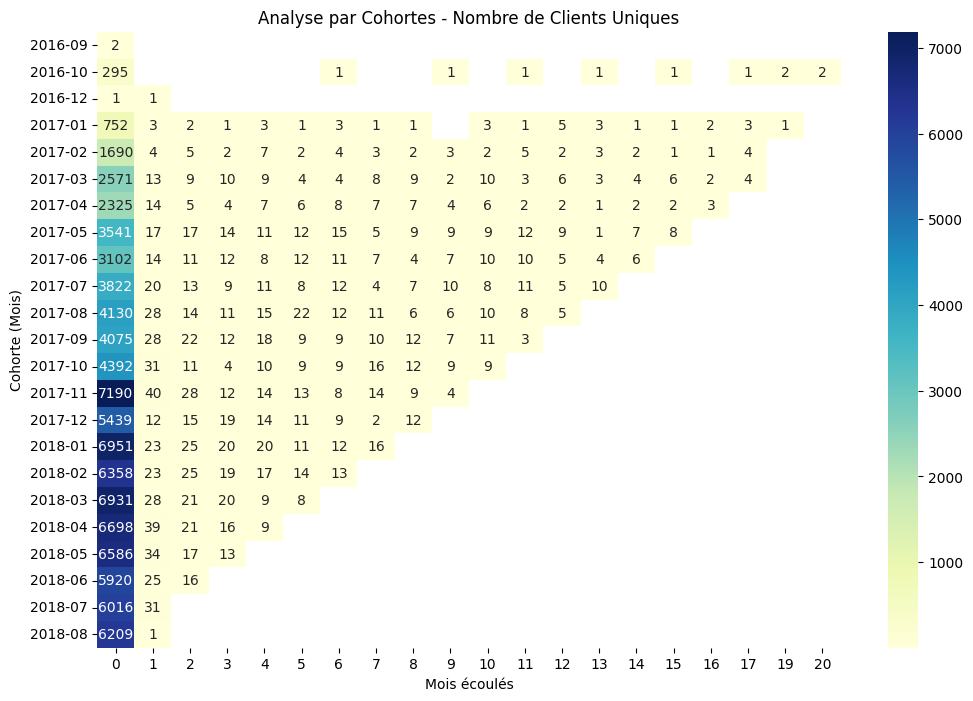

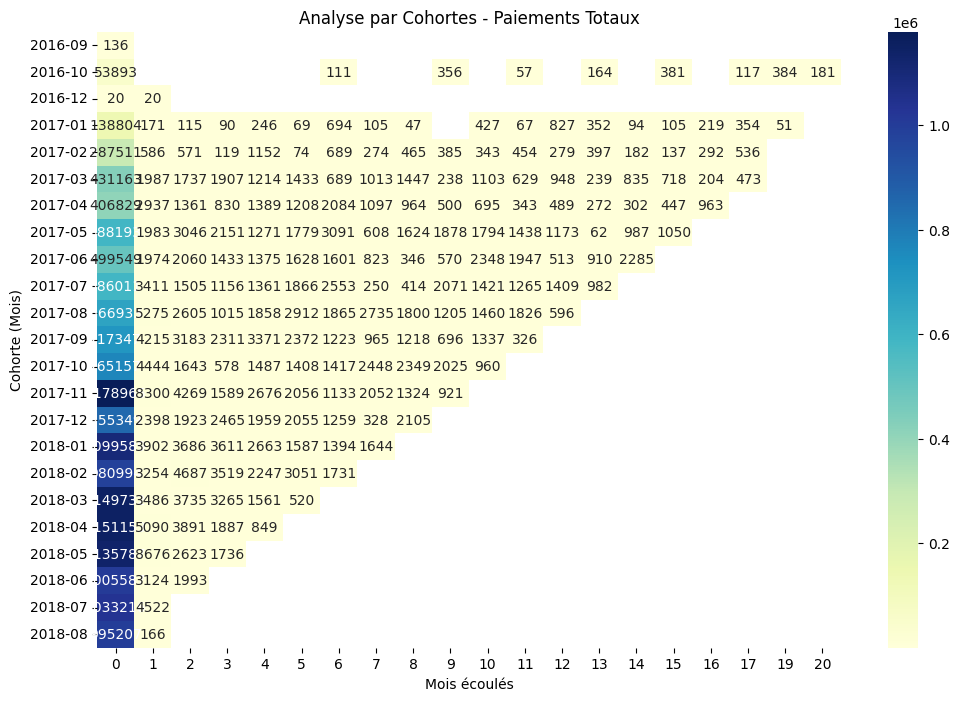

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='num_customers')

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Analyse par Cohortes - Nombre de Clients Uniques')
plt.xlabel('Mois écoulés')
plt.ylabel('Cohorte (Mois)')
plt.show()

payment_pivot = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='total_payment')

plt.figure(figsize=(12, 8))
sns.heatmap(payment_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Analyse par Cohortes - Paiements Totaux')
plt.xlabel('Mois écoulés')
plt.ylabel('Cohorte (Mois)')
plt.show()


# me

In [22]:
dj = pd.read_csv("db_customers.csv")
dj.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [30]:
dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     105383 non-null  int64         
 1   order_id                       105383 non-null  object        
 2   customer_id                    105383 non-null  object        
 3   order_status                   105383 non-null  object        
 4   order_purchase_timestamp       105383 non-null  datetime64[ns]
 5   payment_type                   105382 non-null  object        
 6   payment_installments           105382 non-null  float64       
 7   payment_value                  105382 non-null  float64       
 8   review_score                   105383 non-null  int64         
 9   customer_unique_id             105383 non-null  object        
 10  customer_zip_code_prefix       105383 non-null  int64         
 11  

In [26]:
print("le nombre de NAN pour pour la colone -order_delivered_customer_date- est de :")
print(dj['order_delivered_customer_date'].isnull().sum())


le nombre de NAN pour pour la colone -order_delivered_customer_date- est de :
3159


In [27]:
colonnes_a_supprimer = ['order_delivered_customer_date']
dj = dj.drop(columns=colonnes_a_supprimer)


Convertir les colonnes de date en datetime

In [29]:
dj['order_purchase_timestamp'] = pd.to_datetime(dj['order_purchase_timestamp'])

In [31]:
dj['order_month'] = dj['order_purchase_timestamp'].dt.to_period('M')

dj['cohort_month'] = dj.groupby('customer_unique_id')['order_purchase_timestamp'] \
                       .transform('min') \
                       .dt.to_period('M')


In [33]:
dj['cohort_index'] = (dj['order_month'] - dj['cohort_month']).apply(lambda x: x.n)

cohort_data = dj.groupby(['cohort_month', 'cohort_index']) \
                .agg(n_customers=('customer_unique_id', 'nunique')) \
                .reset_index()

cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='n_customers')


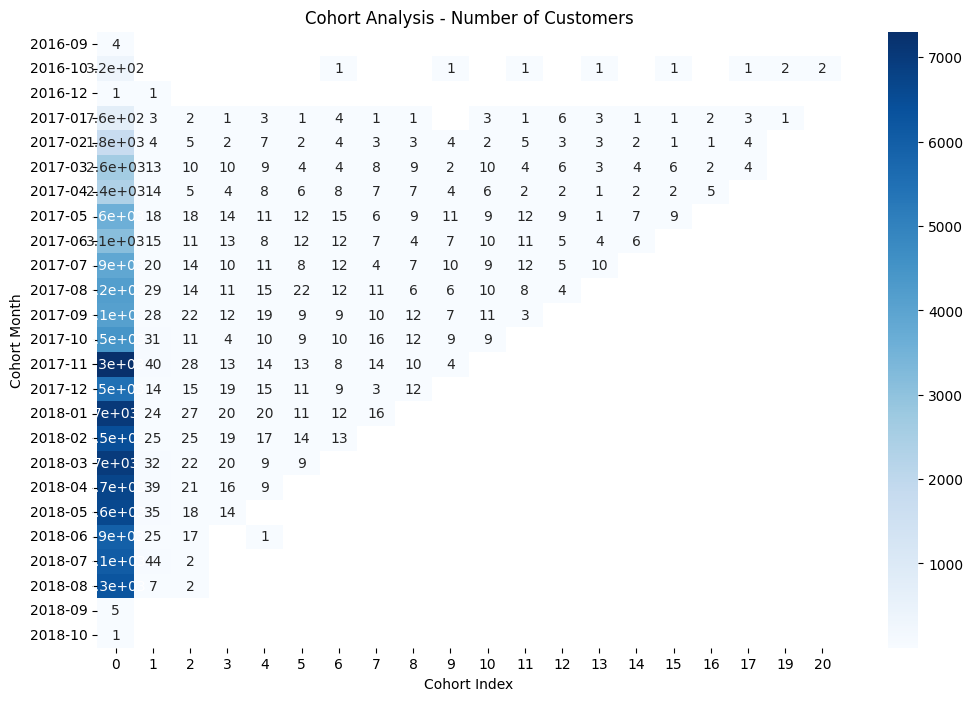

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, cmap='Blues')
plt.title('Cohort Analysis - Number of Customers')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()


In [35]:
dj['cohort_index'] = (dj['order_month'] - dj['cohort_month']).apply(lambda x: x.n)

cohort_data = dj.groupby(['cohort_month', 'cohort_index']) \
                .agg(n_customers=('customer_unique_id', 'nunique')) \
                .reset_index()

cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)


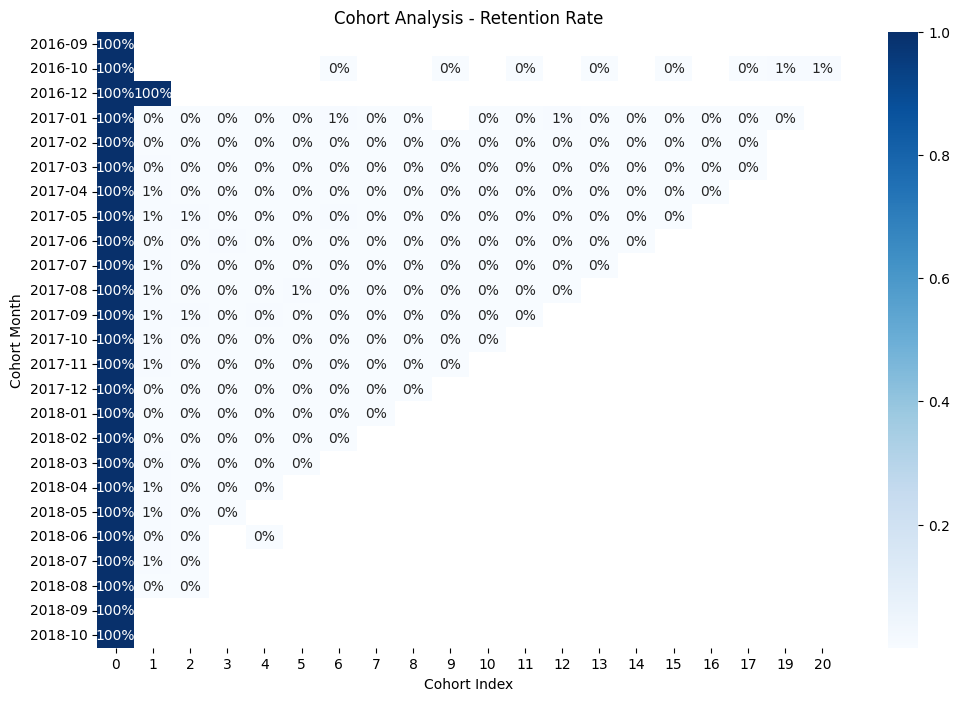

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()


# Cohorte pour septembre 2016

In [91]:
print(dj['order_purchase_timestamp'].isna().sum())


0


In [45]:
dj = dj.dropna(subset=['order_purchase_timestamp'])

dj['order_day'] = dj['order_purchase_timestamp'].dt.to_period('D')

dj['cohort_day'] = dj.groupby('customer_unique_id')['order_purchase_timestamp'] \
                     .transform('min') \
                     .dt.to_period('D')



In [46]:
dj_cohort = dj[dj['cohort_day'] == '2016-09-01']  



In [49]:
nat_in_order_purchase_timestamp = dj[dj['order_purchase_timestamp'].isna()]

print("Valeurs NaT dans 'order_purchase_timestamp':")
print(nat_in_order_purchase_timestamp)

Valeurs NaT dans 'order_purchase_timestamp':
Empty DataFrame
Columns: [Unnamed: 0, order_id, customer_id, order_status, order_purchase_timestamp, payment_type, payment_installments, payment_value, review_score, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, product_category_name_english, order_month, cohort_month, cohort_index, order_day, cohort_day]
Index: []


In [50]:
dj = dj.dropna(subset=['order_purchase_timestamp'])

print(dj['order_purchase_timestamp'].isna().sum())


0


In [51]:
dj['order_purchase_timestamp'].fillna(method='ffill', inplace=True)



/var/folders/hv/qb9lpf4s1vb_cvvdn3cr1s6r0000gn/T/ipykernel_19347/172559998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dj['order_purchase_timestamp'].fillna(method='ffill', inplace=True)
/var/folders/hv/qb9lpf4s1vb_cvvdn3cr1s6r0000gn/T/ipykernel_19347/172559998.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dj['order_purchase_timestamp'].fillna(method='ffill', inplace=True)


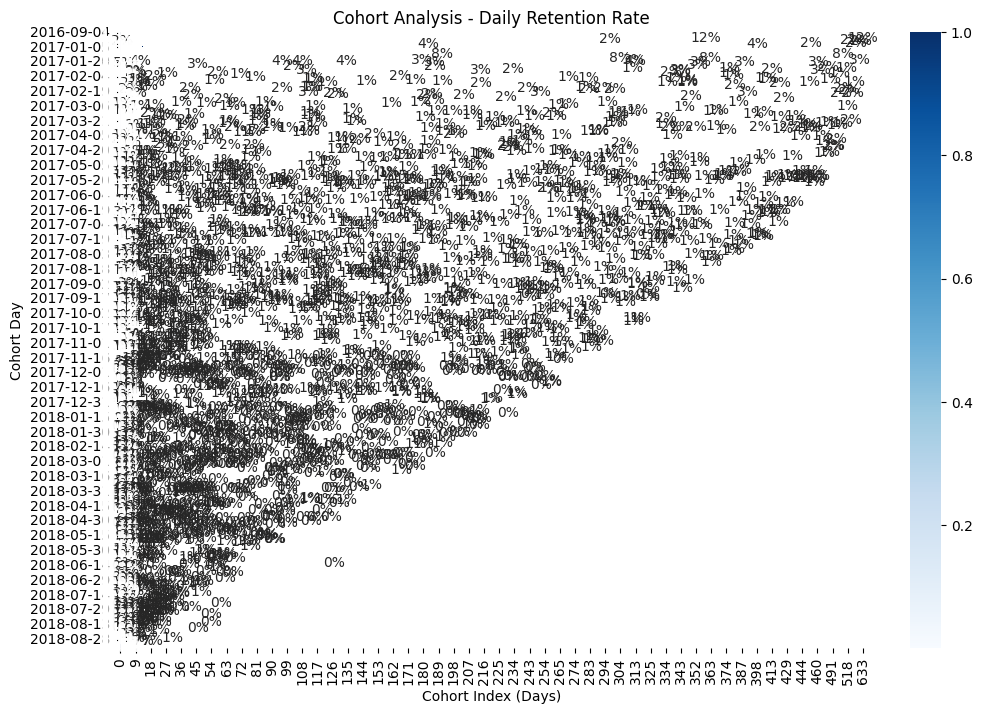

In [53]:


dj['order_purchase_timestamp'] = pd.to_datetime(dj['order_purchase_timestamp'], errors='coerce')

dj['order_day'] = dj['order_purchase_timestamp'].dt.to_period('D')

dj['cohort_day'] = dj.groupby('customer_unique_id')['order_purchase_timestamp'] \
                     .transform('min') \
                     .dt.to_period('D')

dj = dj.dropna(subset=['cohort_day'])

dj['cohort_index'] = (dj['order_day'] - dj['cohort_day']).apply(lambda x: x.n)

cohort_data = dj.groupby(['cohort_day', 'cohort_index']) \
                       .agg(n_customers=('customer_unique_id', 'nunique')) \
                       .reset_index()

cohort_pivot = cohort_data.pivot(index='cohort_day', columns='cohort_index', values='n_customers')

cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Daily Retention Rate')
plt.xlabel('Cohort Index (Days)')
plt.ylabel('Cohort Day')
plt.show()


# Histogramme des scores de révision


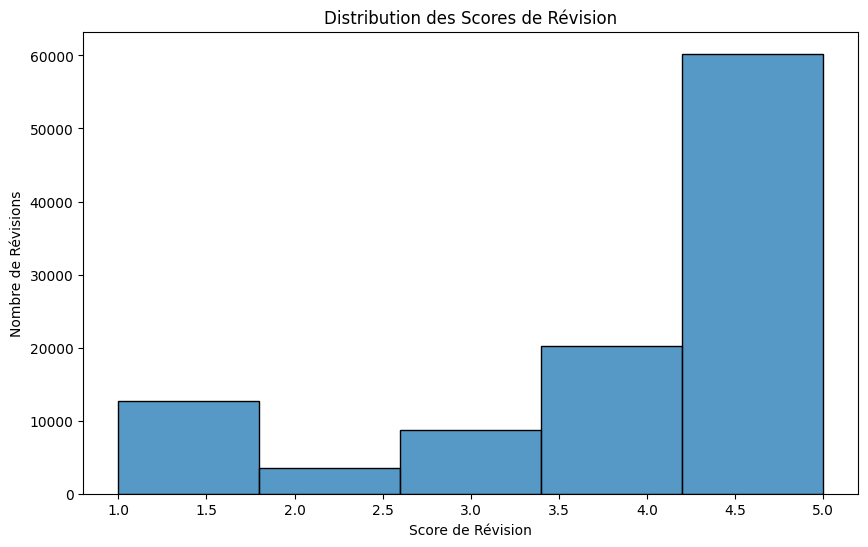

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(dj['review_score'], bins=5, kde=False)
plt.title('Distribution des Scores de Révision')
plt.xlabel('Score de Révision')
plt.ylabel('Nombre de Révisions')
plt.show()


# Revenus par catégorie de produit

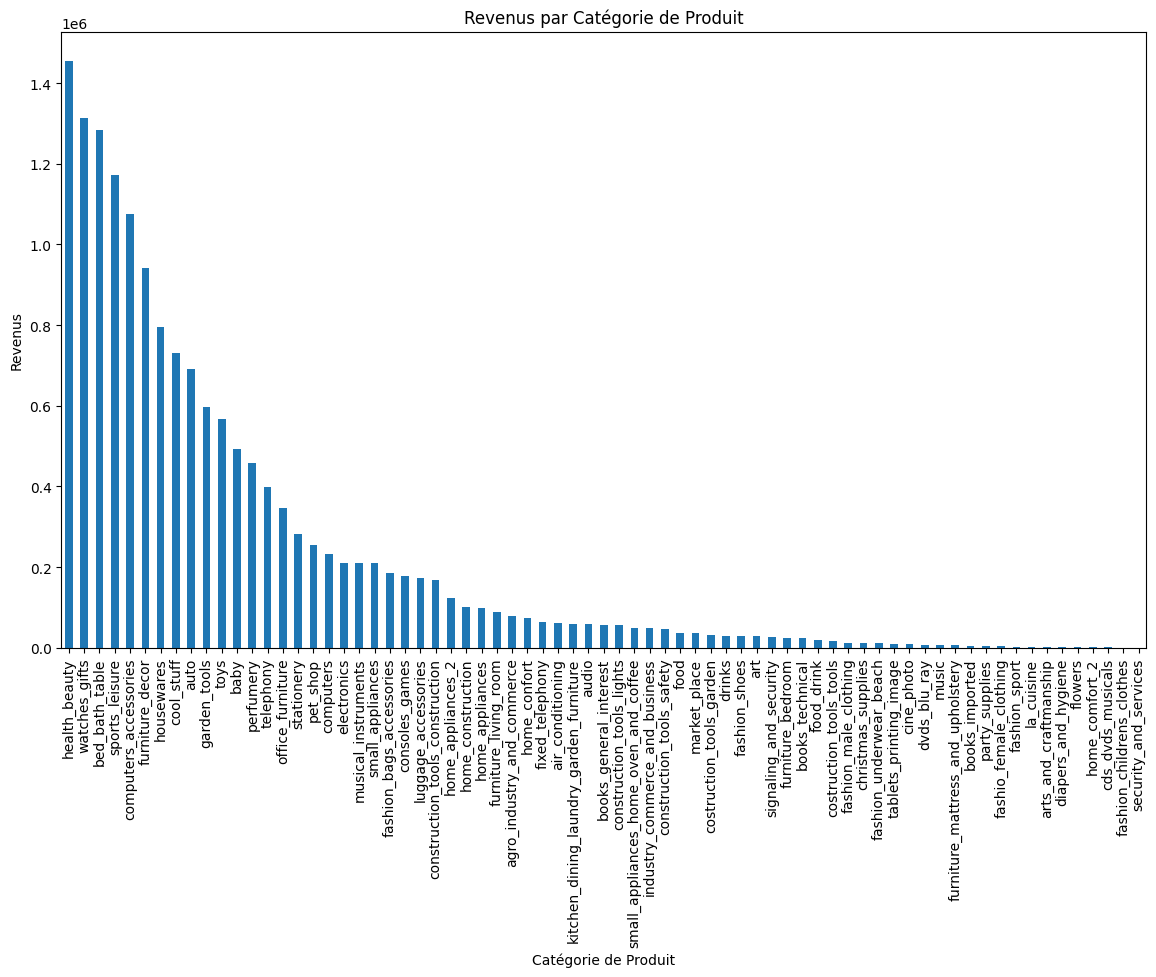

In [55]:
# Revenus par catégorie de produit
product_revenue = dj.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
product_revenue.plot(kind='bar')
plt.title('Revenus par Catégorie de Produit')
plt.xlabel('Catégorie de Produit')
plt.ylabel('Revenus')
plt.show()


# Répartition des ventes par état


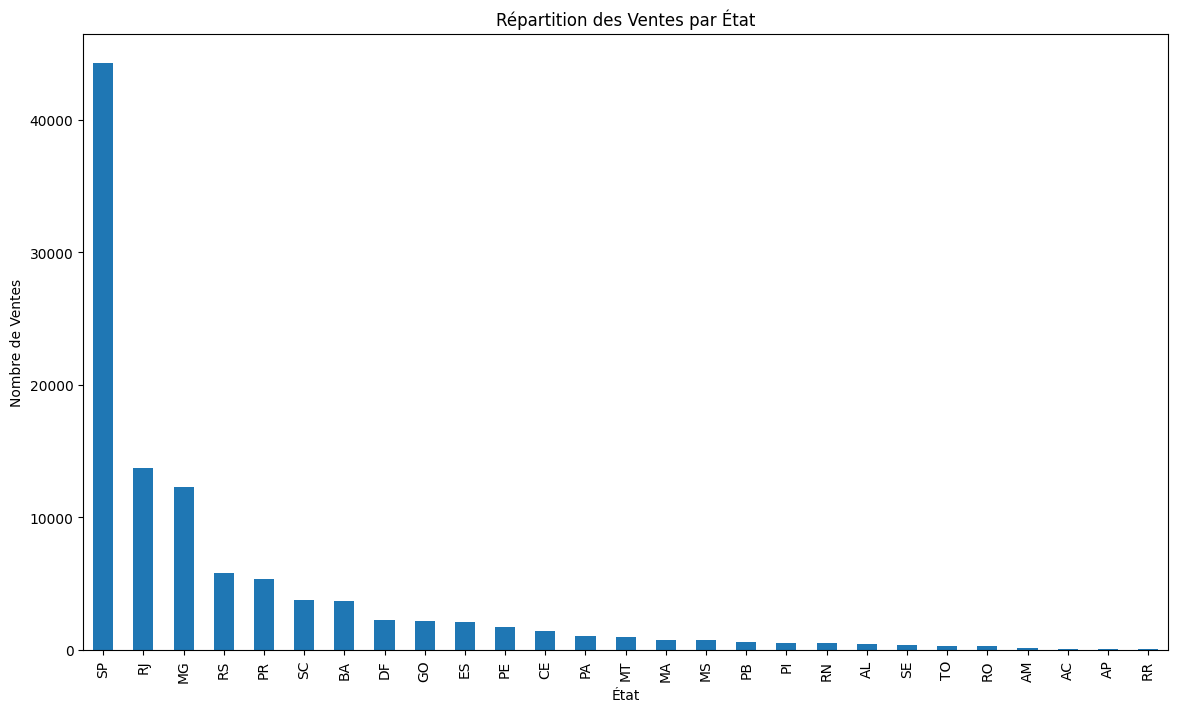

In [56]:
sales_by_state = dj['customer_state'].value_counts()

plt.figure(figsize=(14, 8))
sales_by_state.plot(kind='bar')
plt.title('Répartition des Ventes par État')
plt.xlabel('État')
plt.ylabel('Nombre de Ventes')
plt.show()


# Tendance des ventes au fil du temps


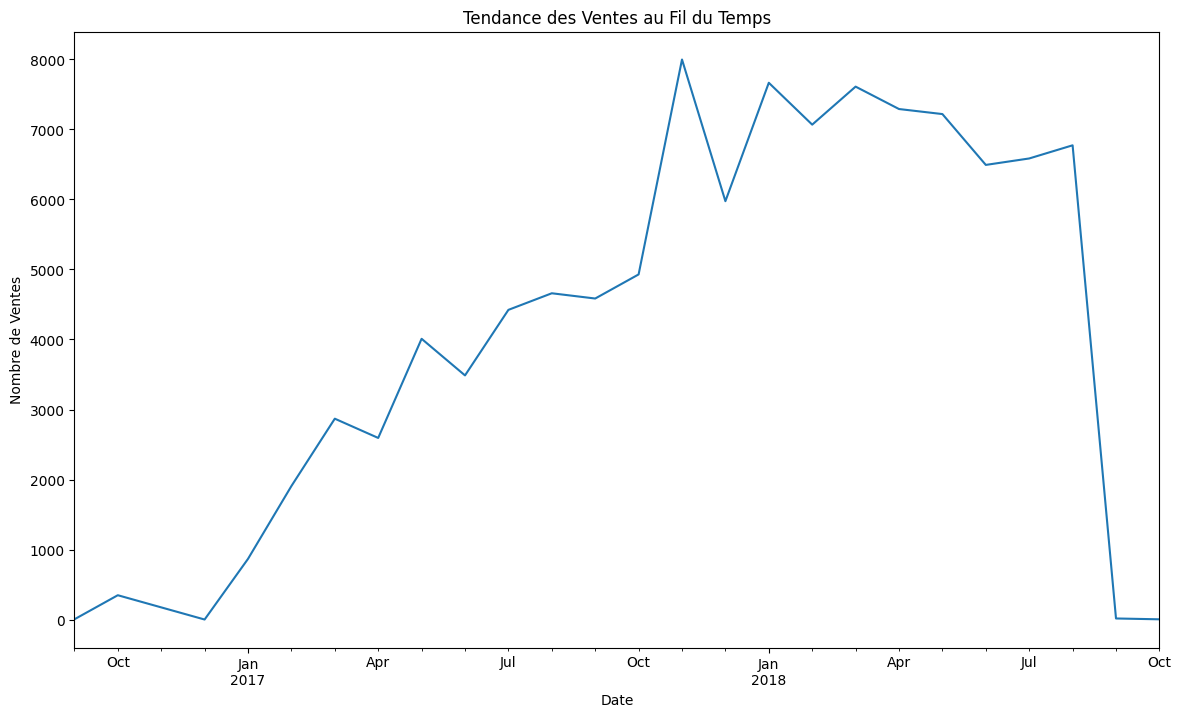

In [57]:
dj['order_purchase_date'] = dj['order_purchase_timestamp'].dt.to_period('M')
sales_trend = dj.groupby('order_purchase_date').size()

plt.figure(figsize=(14, 8))
sales_trend.plot()
plt.title('Tendance des Ventes au Fil du Temps')
plt.xlabel('Date')
plt.ylabel('Nombre de Ventes')
plt.show()


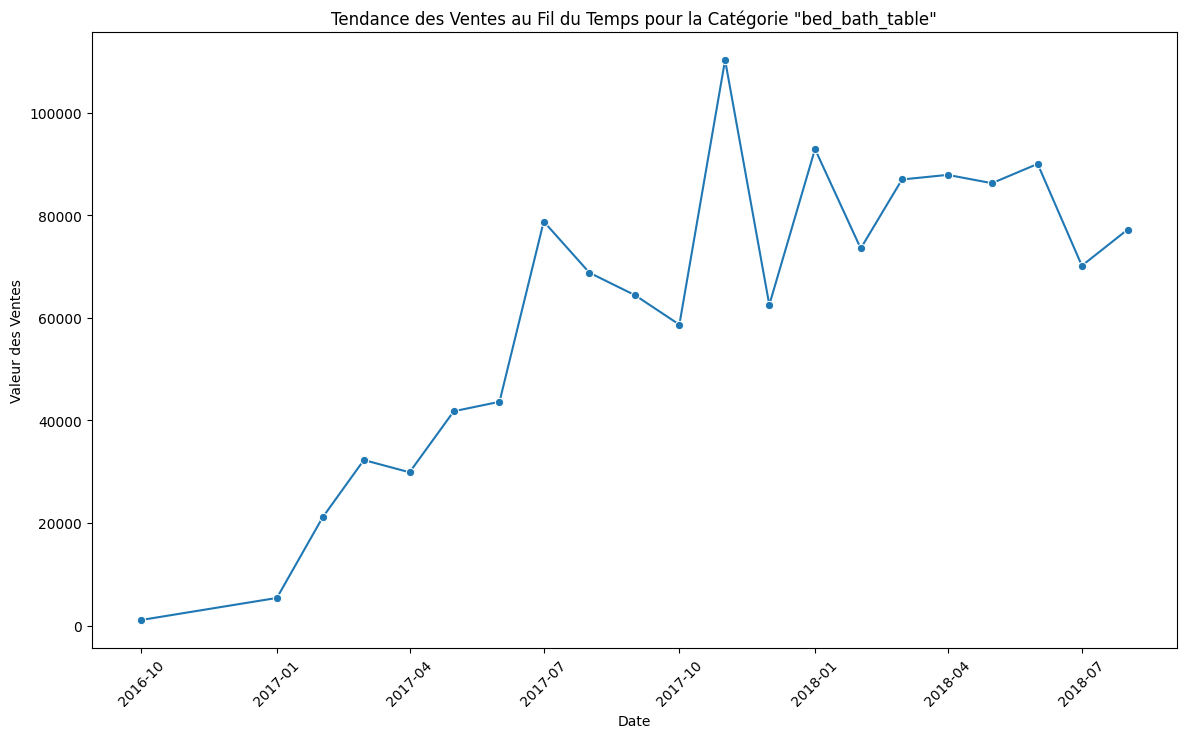

In [90]:
# Convertir les colonnes de date en datetime et gérer les erreurs
dj['order_purchase_timestamp'] = pd.to_datetime(dj['order_purchase_timestamp'], errors='coerce')

# Ajouter une colonne pour l'année et le mois de l'achat
dj['order_month'] = dj['order_purchase_timestamp'].dt.to_period('M')

# Filtrer les données pour la catégorie "bed_bath_table"
bed_bath_table = dj[dj['product_category_name_english'] == 'bed_bath_table']

# Calculer les ventes mensuelles pour la catégorie "bed_bath_table"
monthly_sales = bed_bath_table.groupby('order_month').agg({'payment_value': 'sum'}).reset_index()

# Convertir 'order_month' en datetime pour faciliter la visualisation
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

# Visualiser la tendance des ventes
plt.figure(figsize=(14, 8))
sns.lineplot(x='order_month', y='payment_value', data=monthly_sales, marker='o')
plt.title('Tendance des Ventes au Fil du Temps pour la Catégorie "bed_bath_table"')
plt.xlabel('Date')
plt.ylabel('Valeur des Ventes')
plt.xticks(rotation=45)
plt.show()


# Top 3 des Meilleures Ventes pour les 5 Villes avec le Plus de Ventes

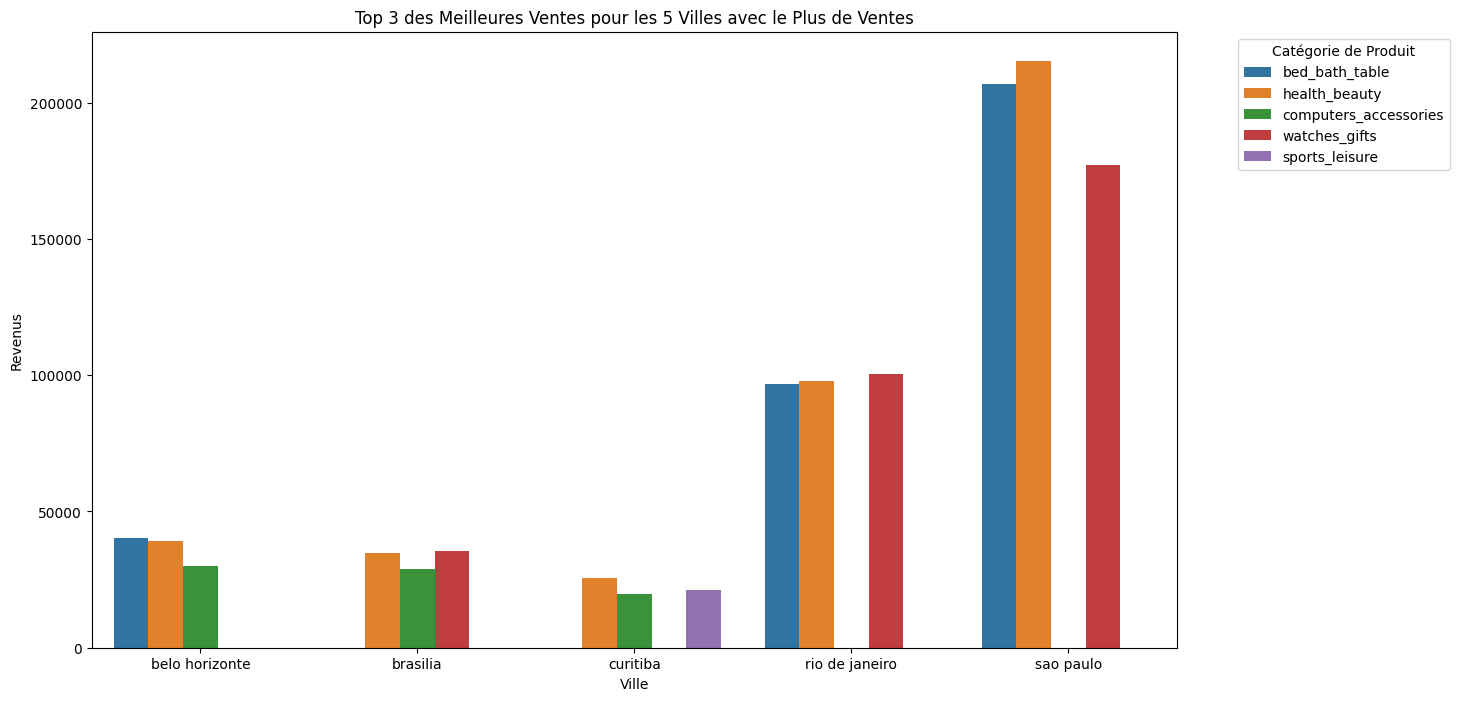

In [60]:


dj['order_purchase_timestamp'] = pd.to_datetime(dj['order_purchase_timestamp'], errors='coerce')

top_cities = dj['customer_city'].value_counts().head(5).index

dj_top_cities = dj[dj['customer_city'].isin(top_cities)]

top_sales = dj_top_cities.groupby(['customer_city', 'product_category_name_english'])['payment_value'].sum().reset_index()

top_sales = top_sales.sort_values(['customer_city', 'payment_value'], ascending=[True, False])
top_3_sales_per_city = top_sales.groupby('customer_city').head(3)

plt.figure(figsize=(14, 8))
sns.barplot(x='customer_city', y='payment_value', hue='product_category_name_english', data=top_3_sales_per_city)
plt.title('Top 3 des Meilleures Ventes pour les 5 Villes avec le Plus de Ventes')
plt.xlabel('Ville')
plt.ylabel('Revenus')
plt.legend(title='Catégorie de Produit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Identifier les 5 villes avec le plus d'avis

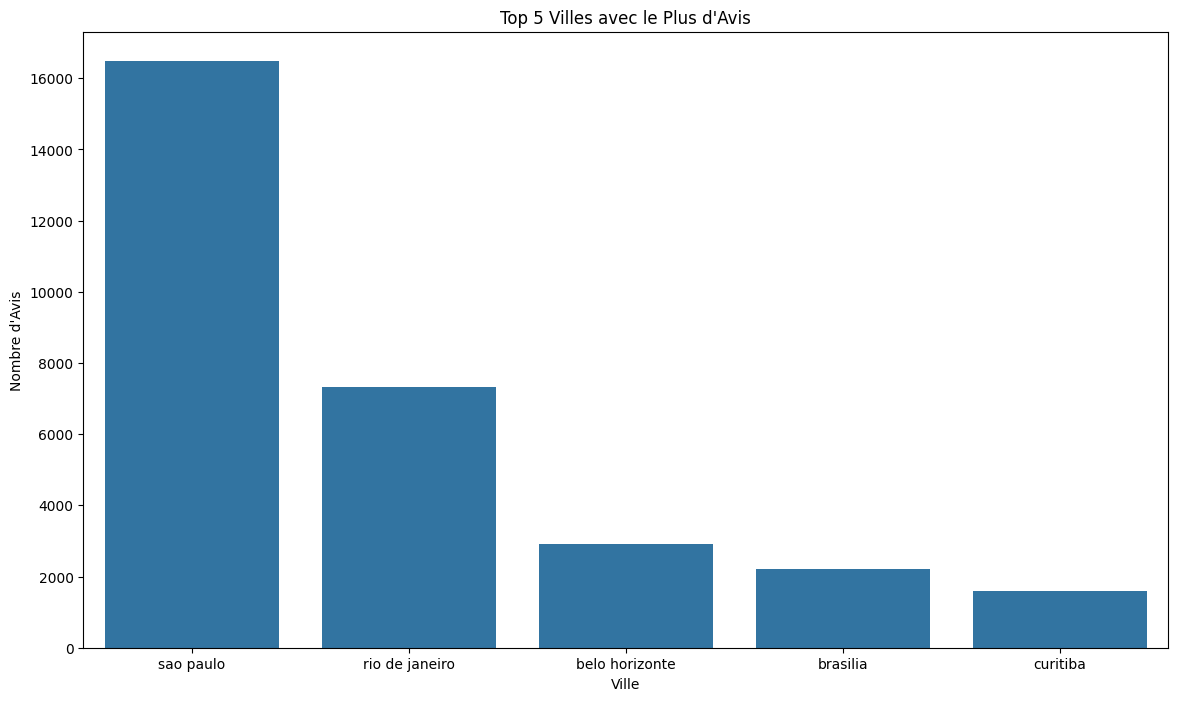

In [61]:
top_review_cities = dj['customer_city'].value_counts().head(5).index

dj_top_review_cities = dj[dj['customer_city'].isin(top_review_cities)]

reviews_per_city = dj_top_review_cities['customer_city'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=reviews_per_city.index, y=reviews_per_city.values)
plt.title('Top 5 Villes avec le Plus d\'Avis')
plt.xlabel('Ville')
plt.ylabel('Nombre d\'Avis')
plt.show()


# les 10 produits avec le plus d'avis négatifs (avis entres 1 et 2)


/var/folders/hv/qb9lpf4s1vb_cvvdn3cr1s6r0000gn/T/ipykernel_19347/3557438775.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='negative_review_count', y='product_category_name_english', data=top_10_negative_reviews, palette='Reds_d')


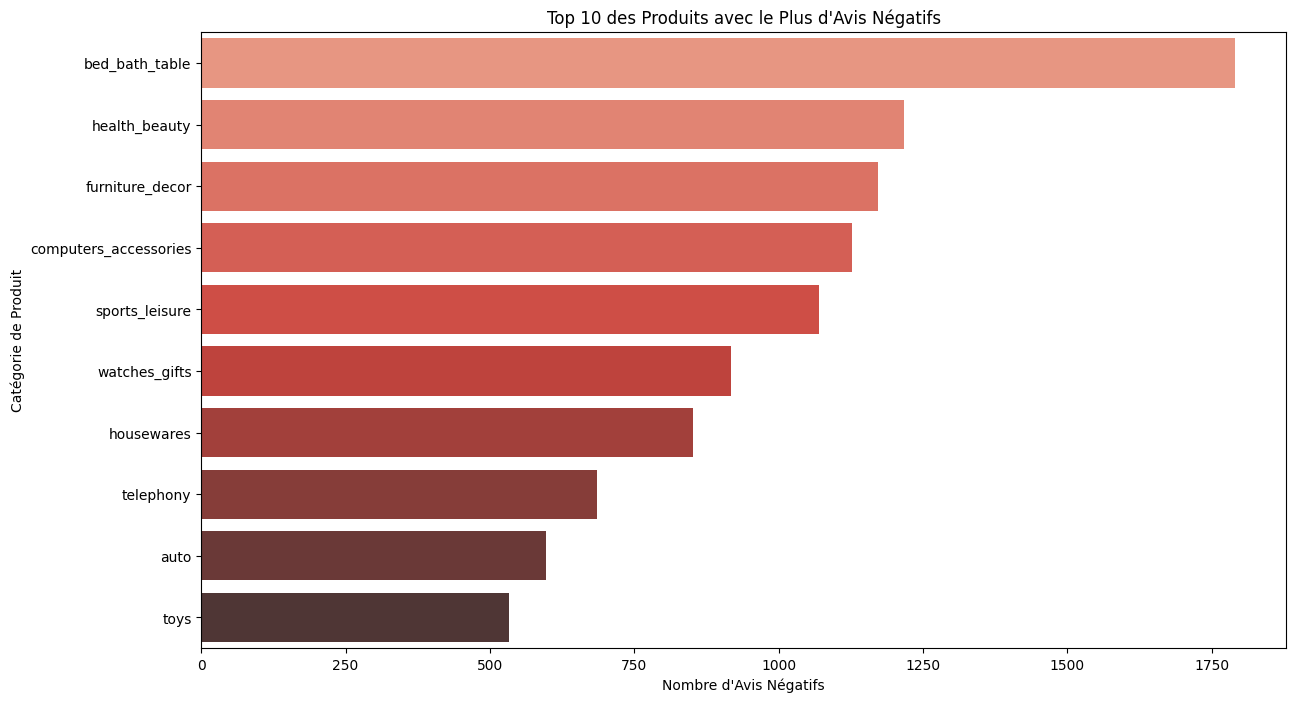

In [62]:
negative_reviews = dj[dj['review_score'].isin([1, 2])]

negative_reviews_count = negative_reviews.groupby('product_category_name_english').size().reset_index(name='negative_review_count')

top_10_negative_reviews = negative_reviews_count.sort_values(by='negative_review_count', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='negative_review_count', y='product_category_name_english', data=top_10_negative_reviews, palette='Reds_d')
plt.title('Top 10 des Produits avec le Plus d\'Avis Négatifs')
plt.xlabel('Nombre d\'Avis Négatifs')
plt.ylabel('Catégorie de Produit')
plt.show()

In [72]:
dj

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,order_month,cohort_index,order_day
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017-10,28,2017-10-02
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017-10,28,2017-10-02
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,2017-10,28,2017-10-02
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery,2018-07,0,2018-07-24
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto,2018-08,0,2018-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty,2017-03,0,2017-03-09
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby,2018-02,0,2018-02-06
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2,2017-08,0,2017-08-27
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories,2018-01,0,2018-01-08


# Corélation 

In [73]:
dj['order_purchase_timestamp'] = pd.to_datetime(dj['order_purchase_timestamp'], errors='coerce')

dj['order_month'] = dj['order_purchase_timestamp'].dt.to_period('M')

dj['order_day'] = (dj['order_purchase_timestamp'] - dj['order_purchase_timestamp'].min()).dt.days

In [77]:
columns_of_interest = ['review_score', 'payment_value', 'payment_installments', 'order_day']

df_corr = dj[columns_of_interest]


In [78]:
correlation_matrix = df_corr.corr()


Visualiser la matrice de corrélation


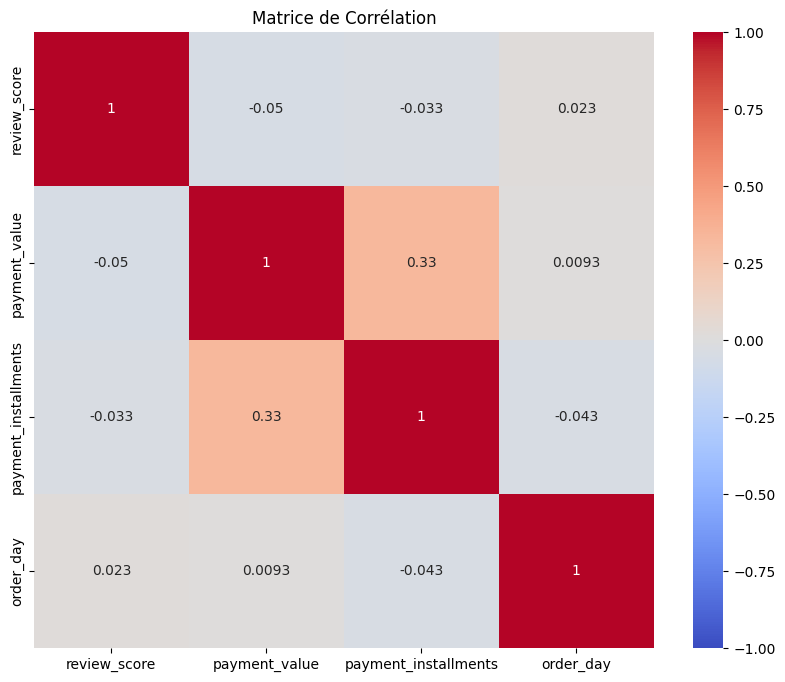

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


Visualiser la corrélation entre les scores de révision et la valeur de paiement


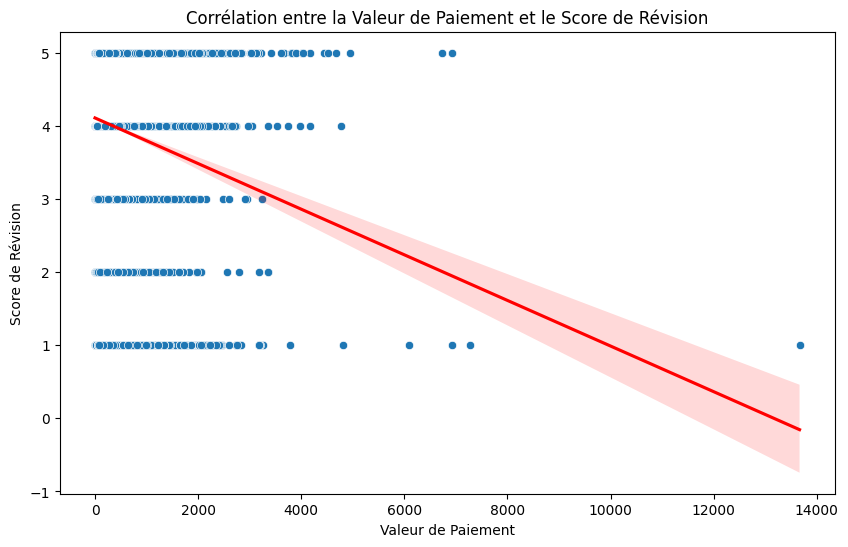

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_value', y='review_score', data=dj)
sns.regplot(x='payment_value', y='review_score', data=dj, scatter=False, color='red')
plt.title('Corrélation entre la Valeur de Paiement et le Score de Révision')
plt.xlabel('Valeur de Paiement')
plt.ylabel('Score de Révision')
plt.show()

visualiser la corrélation entre les scores de révision et le nombre de paiements


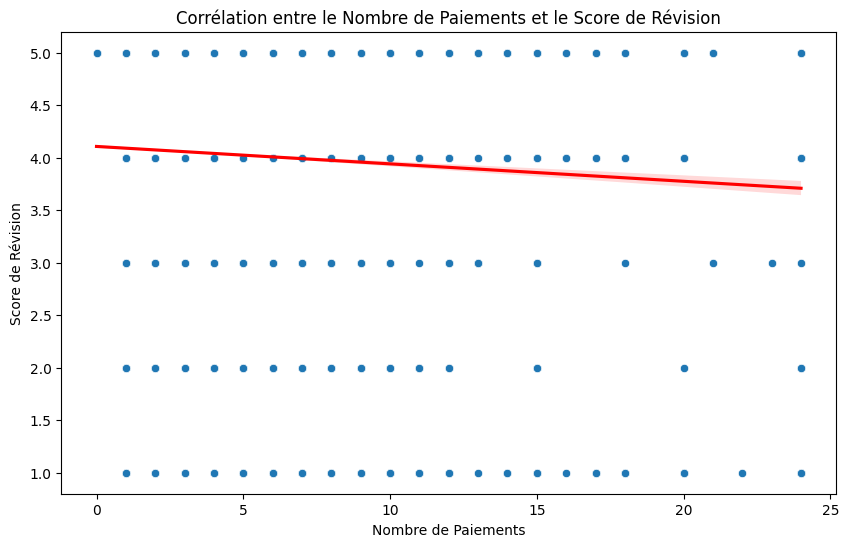

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_installments', y='review_score', data=dj)
sns.regplot(x='payment_installments', y='review_score', data=dj, scatter=False, color='red')
plt.title('Corrélation entre le Nombre de Paiements et le Score de Révision')
plt.xlabel('Nombre de Paiements')
plt.ylabel('Score de Révision')
plt.show()